In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/compressed_data.csv", engine='python')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
# Basic info about the dataset
df.info()

# Summary statistics of numeric columns
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10562 entries, 0 to 10561
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10562 non-null  int64  
 1   NAME                            10498 non-null  object 
 2   host id                         10562 non-null  int64  
 3   host_identity_verified          10467 non-null  object 
 4   host name                       10534 non-null  object 
 5   neighbourhood group             10535 non-null  object 
 6   neighbourhood                   10546 non-null  object 
 7   lat                             10554 non-null  float64
 8   long                            10554 non-null  float64
 9   country                         10512 non-null  object 
 10  country code                    10483 non-null  object 
 11  instant_bookable                10483 non-null  object 
 12  cancellation_policy             

,0
id,0
NAME,64
host id,0
host_identity_verified,95
host name,28
neighbourhood group,27
neighbourhood,16
lat,8
long,8
country,50


In [7]:
# Remove $ from price and service fee and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Convert last_review column to datetime
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Display cleaned data
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2872765720.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-2872765720.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-2872765720.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'], errors='coerce')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


/tmp/ipython-input-3945260623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood group', data=df, palette='Set1')


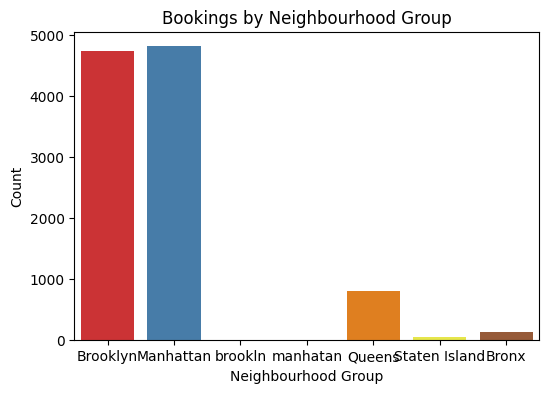

In [9]:
# Bookings by neighbourhood group
plt.figure(figsize=(6,4))
sns.countplot(x='neighbourhood group', data=df, palette='Set1')
plt.title('Bookings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1416626748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='room type', data=df, palette='Set3')


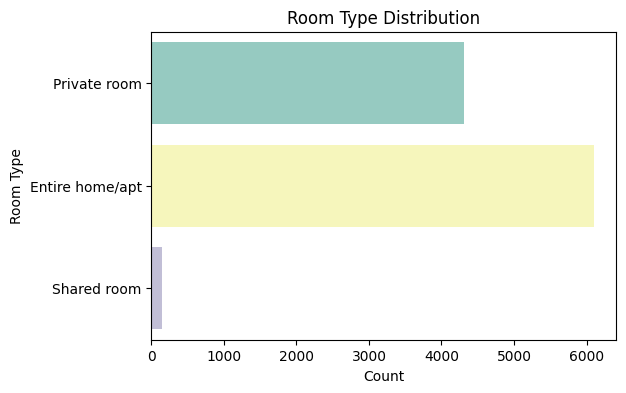

In [10]:
# Count of different room types
plt.figure(figsize=(6,4))
sns.countplot(y='room type', data=df, palette='Set3')
plt.title('Room Type Distribution')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()


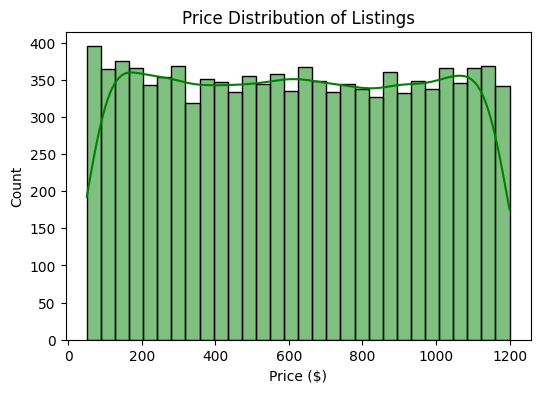

In [12]:
# Price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=30, kde=True, color='green')
plt.title('Price Distribution of Listings')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

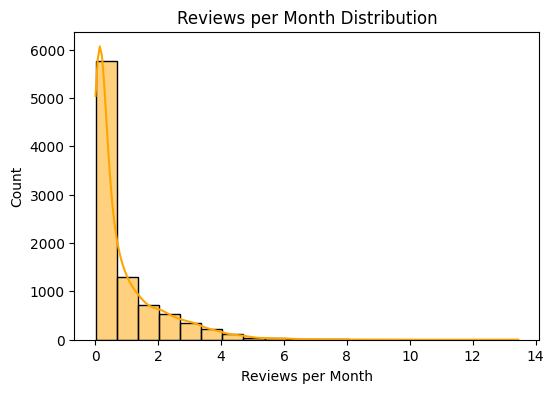

In [13]:
# Average number of reviews by neighbourhood group
avg_reviews = df.groupby('neighbourhood group')['number of reviews'].mean()
avg_reviews

# Plot reviews per month distribution
plt.figure(figsize=(6,4))
sns.histplot(df['reviews per month'].dropna(), bins=20, kde=True, color='orange')
plt.title('Reviews per Month Distribution')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.show()


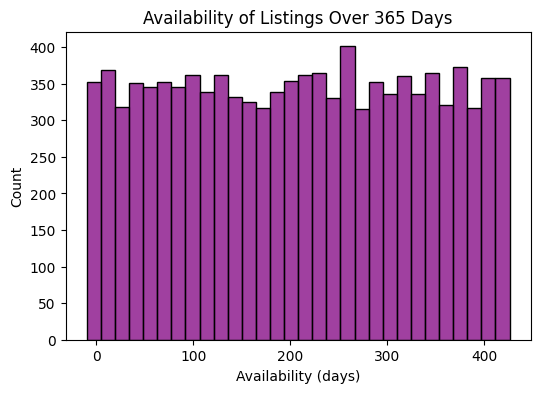

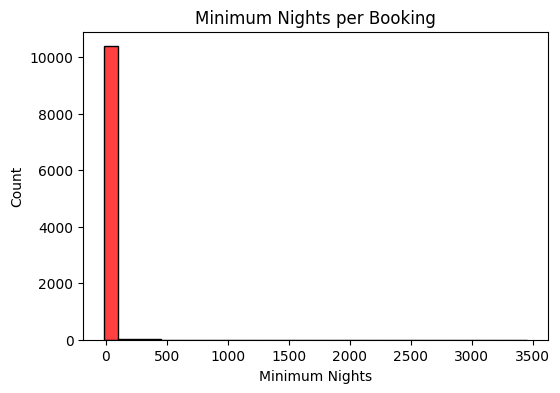

In [14]:
# Availability 365 days
plt.figure(figsize=(6,4))
sns.histplot(df['availability 365'], bins=30, kde=False, color='purple')
plt.title('Availability of Listings Over 365 Days')
plt.xlabel('Availability (days)')
plt.ylabel('Count')
plt.show()

# Minimum nights distribution
plt.figure(figsize=(6,4))
sns.histplot(df['minimum nights'], bins=30, kde=False, color='red')
plt.title('Minimum Nights per Booking')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.show()


In [15]:
# Print some key insights
print("Insights from the Airbnb Dataset:")
print("1. Most bookings are for 'Entire home/apt' room type.")
print("2. Manhattan has the highest number of bookings among neighbourhood groups.")
print("3. Prices vary widely, with most listings below $1000.")
print("4. Some listings have very high minimum nights; these may be outliers.")
print("5. Reviews per month is generally low, showing seasonal or occasional bookings.")


Insights from the Airbnb Dataset:
1. Most bookings are for 'Entire home/apt' room type.
2. Manhattan has the highest number of bookings among neighbourhood groups.
3. Prices vary widely, with most listings below $1000.
4. Some listings have very high minimum nights; these may be outliers.
5. Reviews per month is generally low, showing seasonal or occasional bookings.
